# Exercise 1

## Exercise 1.1

write a code that prints the following pattern. Try to use as few loops as possible.

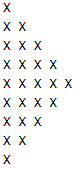

Avoid using trivial solutions like:

print('X')

print('X X')

print('X X X')

.....

print('X X X')

print('X X')

print('X')


In [1]:
for i in range(1, 10):
    if i <= 5:
        print("X " * i)
    else:
        print("X " * (10 - i))

X 
X X 
X X X 
X X X X 
X X X X X 
X X X X 
X X X 
X X 
X 


## Exercise 1.2

Write a script that will sum all numbers in the following string. You can split each number into single digits, so for example, you can consider 45 to be 4 and 5

In [2]:
input_str = "n45as29@#8ss6"
total_sum = 0

for char in input_str:
    if char.isdigit():
        total_sum += int(char)

print("The total sum is:", total_sum)

The total sum is: 34


## Exercise 1.3

Write a script that will convert an arbitrary integer to a binary number (the number will be represented as a string with only *0* and *1*). Avoid using the *bin()* function or any other pythons default functions

In [3]:
number = 77
binary_result = ""

while number > 0:
    remainder = number % 2
    binary_result = str(remainder) + binary_result
    number = number // 2

print(binary_result)

1001101


## Exercise 1.4 - The Fibonacci Sequence:

The Fibonacci Sequence is a series of numbers. The following number is found by adding up the two numbers before it. The first two numbers are 0 and 1. For example, 0, 1, 1, 2, 3, 5, 8, 13. The following number in this series above is 8 + 13 = 21


Your task is to implement a function *fibonacci* that takes an integer as an input and returns a list that contains all Fibonacci numbers with values lower than the input integer

Example:

*print(fibonaci(10))*

[0, 1, 1, 2, 3, 5, 8]


In [4]:
def fibonacci(upper_threshold: int) -> list:
    fib_list=[]
    a=0
    b=1

    while a < upper_threshold:
        fib_list.append(a)
        a, b = b, a + b

    return fib_list


print(fibonacci(10))

[0, 1, 1, 2, 3, 5, 8]


#### Advanced

Try to implement the function using multiple approaches: *Iterative approach*, *Recusrion*, *Memoization*

## Exercise 1.5. -  Rock, Paper, Scissors game:

#### basic

*Rock, Paper, Scissors* is a well-known and straightforward game. If you do not know the rules, google them. We will write a code for the Rock, Paper, Scissors game where the user plays against a random computer. The code can be written into one function *rock_paper_scissors*.

Notes:
- This implementation uses the **random** library to enable the computer to make a random choice.
- Keyword **Input** may be helpful. Check it
- After the function is run, the program will ask you about your movement, which you type in
- The game is case-insensitive for user input (e.g., "rock", "Rock", and "ROCK" are all valid).
- This script plays one round of the game.
- The script prints the result ('You lose', 'You win', 'It is a tie')


In [5]:
import random

def rock_paper_scissors() -> None:
    moves = ["rock", "paper", "scissors"]
    user_move = input("Enter your move (rock, paper, or scissors): ")
    if user_move == "":
        print("I am empty")
        return

    computer_move = random.choice(moves)
    print("Computer chose:", computer_move)

    if user_move == computer_move:
        print("It is a tie")
    elif (user_move == "rock" and computer_move == "scissors") or (user_move == "paper" and computer_move == "rock") or (user_move == "scissors" and computer_move == "paper"):
        print("You win")
    else:
        print("You lose")

rock_paper_scissors()

Enter your move (rock, paper, or scissors): rock
Computer chose: scissors
You win


#### Advanced

Extend the Rock, Paper, Scissors game to be able to play *n* rounds.

Notes:
- The scrips will contain two counters - user score and computer score
- After each run, the script prints the current scores and rounds.
- When the number of rounds is reached, the script prints the result ('You lose', 'You win', 'It is a tie')

# Exercise 2

The purpose of this excercise is to practise working with NumPy library

## Exercise 2.1


In this exercise, you will work with NumPy arrays and learn how to efficiently modify and process them using both loops and vectorized operations. Your task is to:

1. Implement the function *create_array_nxn* that generates an n×n NumPy array filled with numbers from n² - 1 down to 0
2. Using a loop-based approach (for-loop, while-loop), implement the function *apply_threshold_loop* that takes any NumPy array and replaces all numbers below a user-defined threshold with 0.
3. Implement function *apply_threshold_vectorized* that performs the same operation as *apply_threshold_loop*, but without loops, using NumPy vectorized operations
4. Implement function *compare_performance* that compares the execution time of functions *apply_threshold_vectorized* and *apply_threshold_loop* with **time** library and print the results


**Additional Notes**:

- Ensure n is a positive integer (n > 0).
- Use the time library to measure execution times for performance comparison.
- The function *compare_performance(n, threshold)* should:
    - Generate an n×n array.
    - Apply both loop-based and vectorized thresholding.
    - Print execution times.

In [6]:
import numpy as np
import time

In [7]:
def create_array_nxn(n: int) -> np.ndarray:
    data = np.arange(n**2 - 1, -1, -1)
    return data.reshape(n, n)

In [8]:
def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
    result = arr.copy()
    rows, cols = result.shape
    for i in range(rows):
        for j in range(cols):
            if result[i, j] < threshold:
                result[i, j] = 0

    return result

In [9]:
def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
    result = arr.copy()
    result[result < threshold] = 0
    return result

In [10]:
def compare_performance(n: int, threshold: int) -> None:
    arr = create_array_nxn(n)

    t1 = time.time()
    apply_threshold_loop(arr, threshold)
    duration_loop = time.time() - t1

    t2 = time.time()
    apply_threshold_vectorized(arr, threshold)
    duration_vec = time.time() - t2

    print("Loop time:", duration_loop)
    print("Vectorized time:", duration_vec)

## Exercise 2.2 - Digi display

#### basic

The task will be to create a simulation of a Digi display that will be able to display an arbitrary integer
   
*hint: to show the image, use the library matplotlib.pyplot. Also, you may find function *np.concatenate* helpful

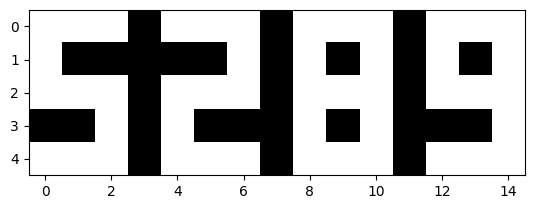

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def show_in_digi(input_integer: int) -> None:
    numbs = {
        "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]),
        "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]),
        "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
        "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]),
        "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
        "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]),
        "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]),
        "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]),
        "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
        "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]),
    }

    digits_to_show = str(input_integer)
    matrices = [numbs[d] for d in digits_to_show]

    spacer = np.zeros((5, 1))
    final_image = matrices[0]

    for m in matrices[1:]:
        final_image = np.concatenate((final_image, spacer, m), axis=1)

    plt.imshow(final_image, cmap='gray')
    plt.show()

show_in_digi(5289)

show_in_digi(5289) will show:


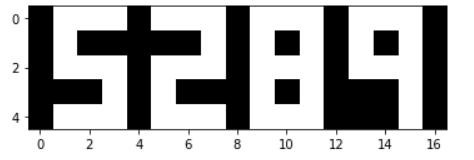

*hint2: you may find the following dict usefull*

In [12]:
numbs = {
      "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 1
      "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]), # 2
      "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 3
      "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]), # 4
      "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 5
      "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 6
      "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 7
      "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 8
      "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 9
      "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]), # 0
  }

#### advanced

Extend your *show_in_digi* function to be able to display an arbitary float number and negative numbers

# Exercise 3 - Playing with California Housing Dataset

The purpose of this exercise is to learn basic operations of **pandas** library. Use *california_housing_dataset* you can find in google colab to do following operations:

- check what *dataset.describe()* does

- display all rows where *total_bedrooms* column is bigger than 310

- drop also first and last row

- save a mean of values in *households* columns to variable, using *matplotlib* display number of households in the graph (x-axis would be ID, y-axis - numbers of households) as dots with the same color, display also mean as a single line in the graph with different color as dots is

 - check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset

 - display *lat* and *long* into plot, *lat* would be on *x* axis and *long* on *y* axis

- choose two arbitrary columns and normalize all values inside using *min-max normalization*:

- Create a Correlation Matrix from all columns

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

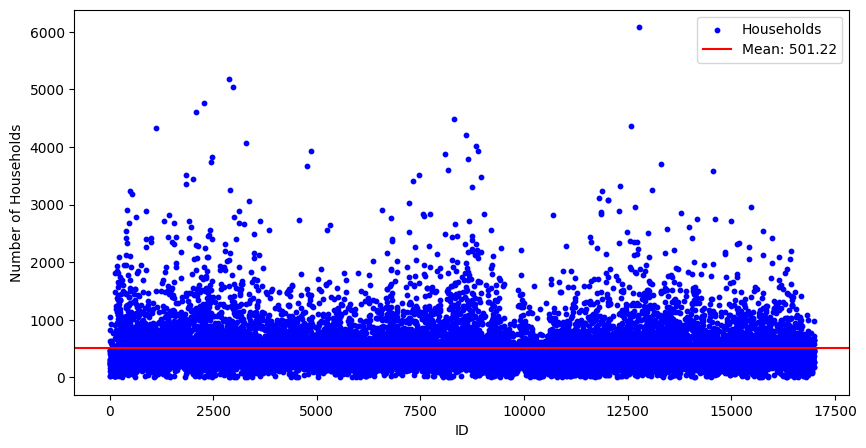

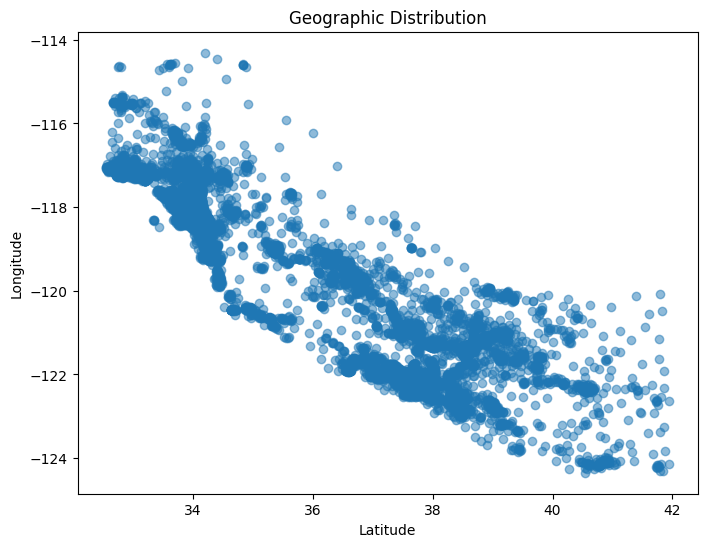

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902      -0.080303   
housing_

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

print(df.describe())

filtered_df = df[df['total_bedrooms'] > 310]
print(filtered_df)

df_dropped = df.iloc[1:-1]

households_mean = df['households'].mean()

plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['households'], color='blue', s=10, label='Households')
plt.axhline(y=households_mean, color='red', linestyle='-', label=f'Mean: {households_mean:.2f}')
plt.xlabel('ID')
plt.ylabel('Number of Households')
plt.legend()
plt.show()

if df.isnull().values.any():
    dataset_mean = df.mean().mean()
    df = df.fillna(dataset_mean)

plt.figure(figsize=(8, 6))
plt.scatter(df['latitude'], df['longitude'], alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographic Distribution')
plt.show()

col1, col2 = 'median_income', 'total_rooms'
df[col1] = (df[col1] - df[col1].min()) / (df[col1].max() - df[col1].min())
df[col2] = (df[col2] - df[col2].min()) / (df[col2].max() - df[col2].min())

correlation_matrix = df.corr()
print(correlation_matrix)